Utilizing a Kaggle online retail dataset to estimate the monthly revenue.

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("data/OnlineRetail.csv", encoding = "ISO-8859-1")

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


It appears that there are orders with negative quantities as well as negative prices. I am assuming that these are returns/refunds. If we simply remove all orders with negative values, then it will bias the dataset. Let's see how many negative values are present in the dataset.

In [33]:
df[ (df.Quantity < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


10.6k rows is approximately 2% of the total data. Additionally, there do not appear to be exact counterparts to the negative quantities, making it hard to delete the corresponding orders. 

Since the metric we are calculating from this dataset is the monthly revenue, we can simply ignore the orders since they will subtract out from the order total.

In [34]:
df[df.Description == 'Adjust bad debt']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


There are only three orders with stock code 'B', two of which have negative price. Removing all 3 orders.

In [35]:
df = df.drop([299982, 299983, 299984]).reset_index(drop=True)

Estimating monthly revenue

In [36]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['OrderTotal'] = df['Quantity'] * df['UnitPrice']

In [37]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [58]:
df['MonthYear'] = df['InvoiceDate'].apply(lambda x: str(x.year*100+x.month))

In [59]:
revenue_df = df.groupby('MonthYear')['OrderTotal'].sum().reset_index()

In [60]:
revenue_df

,MonthYear,OrderTotal
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,693742.570
9,201109,1019687.622


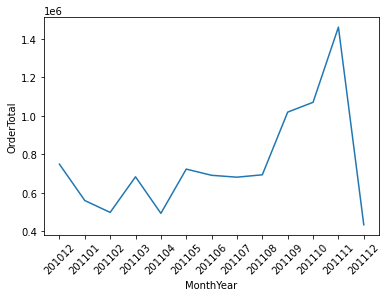

In [67]:
sns.lineplot(data=revenue_df, x='MonthYear', y='OrderTotal')
plt.xticks(rotation=45);

Dropping December, since it's incomplete

In [80]:
revenue_df = revenue_df[:-1]

Figuring out the monthly growth rate

In [81]:
revenue_df['GrowthRate'] = revenue_df['OrderTotal'].pct_change()

<ipython-input-81-a53eac43a2b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_df['GrowthRate'] = revenue_df['OrderTotal'].pct_change()


In [82]:
revenue_df.head()

,MonthYear,OrderTotal,GrowthRate
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


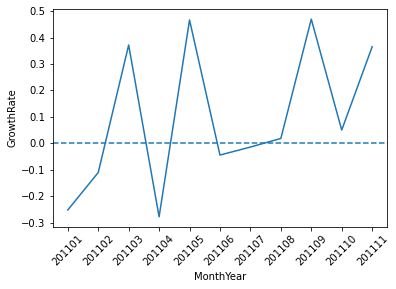

In [83]:
sns.lineplot(data=revenue_df, x='MonthYear', y='GrowthRate')
plt.axhline(y=0, ls='--')
plt.xticks(rotation=45);